In [1]:
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set option to display all columns
pd.set_option('display.max_columns', None)


In [2]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\zaidu\Documents\GitHub\Football_match_prediction\processing


In [3]:
df = pd.read_csv('new.csv')
# Initialize the LabelEncoder
data = df.copy()
# Apply LabelEncoder to HomeTeam and AwayTeam
columns_to_rename  =   {
    'FTHG': 'Home Full-T Goals',
    'FTAG': 'Away Full-T Goals',
    'FTR': 'Full-T Result',
    'HTHG': 'Home Half-T Goals',
    'HTAG': 'Away Half-T Goals',
    'HTR': 'Half-T Result',
    'HS': 'Home Shots',
    'AS': 'Away Shots',
    'HST': 'Home Shots Target',
    'AST': 'Away Shots Target',
    'HF': 'Home Fouls',
    'AF': 'Away Fouls',
    'HC': 'Home Corners',
    'AC': 'Away Corners',
    'HY': 'Home Yellow Cards',
    'AY': 'Away Yellow Cards',
    'HR': 'Home Red Cards',
    'AR': 'Away Red Cards'
}

# Rename the columns using the dictionary
data.rename(columns=columns_to_rename, inplace=True)



In [4]:

data['Full Result_enc'] = data['Full-T Result'].map({'H': 0, 'A': 1, 'D': 2})
data['Half Result_enc'] =data['Half-T Result'].map({'H': 0, 'A': 1, 'D': 2})

# Display the updated DataFrame
data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1508 non-null   int64  
 1   Date               1508 non-null   object 
 2   HomeTeam           1508 non-null   object 
 3   AwayTeam           1508 non-null   object 
 4   Home Full-T Goals  1508 non-null   float64
 5   Away Full-T Goals  1508 non-null   float64
 6   Full-T Result      1508 non-null   object 
 7   Home Half-T Goals  1504 non-null   float64
 8   Away Half-T Goals  1504 non-null   float64
 9   Half-T Result      1504 non-null   object 
 10  Home Shots         1503 non-null   float64
 11  Away Shots         1503 non-null   float64
 12  Home Shots Target  1503 non-null   float64
 13  Away Shots Target  1503 non-null   float64
 14  Home Fouls         1503 non-null   float64
 15  Away Fouls         1503 non-null   float64
 16  Home Corners       1503 

,Unnamed: 0,Date,HomeTeam,AwayTeam,Home Full-T Goals,Away Full-T Goals,Full-T Result,Home Half-T Goals,Away Half-T Goals,Half-T Result,Home Shots,Away Shots,Home Shots Target,Away Shots Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Full Result_enc,Half Result_enc
0,0,2024-09-01,Kortrijk,St Truiden,1.0,1.0,D,0.0,1.0,A,15.0,8.0,4.0,3.0,8.0,12.0,8.0,6.0,1.0,1.0,0.0,0.0,2,1.0
1,1,2024-09-01,St. Gilloise,Anderlecht,0.0,0.0,D,0.0,0.0,D,22.0,10.0,6.0,5.0,10.0,13.0,8.0,4.0,3.0,4.0,0.0,0.0,2,2.0
2,2,2024-09-01,Gent,Antwerp,1.0,1.0,D,1.0,1.0,D,15.0,15.0,8.0,10.0,18.0,10.0,1.0,5.0,4.0,3.0,0.0,0.0,2,2.0
3,3,2024-09-01,Club Brugge,Cercle Brugge,3.0,0.0,H,2.0,0.0,H,21.0,11.0,10.0,3.0,8.0,8.0,4.0,5.0,1.0,1.0,0.0,0.0,0,0.0
4,4,2024-08-31,Oud-Heverlee Leuven,Standard,2.0,0.0,H,1.0,0.0,H,13.0,4.0,4.0,0.0,10.0,17.0,11.0,3.0,4.0,4.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1503,2019-07-27,Waasland-Beveren,Club Brugge,1.0,3.0,A,1.0,1.0,D,7.0,25.0,2.0,22.0,18.0,12.0,1.0,14.0,3.0,1.0,0.0,0.0,1,2.0
1504,1504,2019-07-27,St Truiden,Mouscron,0.0,1.0,A,0.0,1.0,A,10.0,10.0,4.0,6.0,10.0,21.0,5.0,5.0,2.0,4.0,0.0,0.0,1,1.0
1505,1505,2019-07-27,Waregem,Mechelen,0.0,2.0,A,0.0,1.0,A,7.0,10.0,2.0,5.0,14.0,21.0,4.0,2.0,3.0,1.0,0.0,0.0,1,1.0
1506,1506,2019-07-27,Cercle Brugge,Standard,0.0,2.0,A,0.0,0.0,D,13.0,14.0,5.0,9.0,16.0,15.0,3.0,7.0,2.0,2.0,1.0,0.0,1,2.0


In [5]:


def avg_Team_goal(team,overLastMatch) :

    last_fiveM_frame = data[(data['HomeTeam'] == team) | (data['AwayTeam'] == team)]

    last_fiveM_frame = last_fiveM_frame.sort_values(by='Date', ascending=False).head(overLastMatch)
    num_matches = len(last_fiveM_frame)
    if num_matches < overLastMatch :
        return None

    last_fiveM_frame = last_fiveM_frame[['HomeTeam','AwayTeam', 'Home Full-T Goals','Away Full-T Goals']].copy()

    homeSumGoal = last_fiveM_frame[last_fiveM_frame['HomeTeam'] == team ]['Home Full-T Goals'].sum()
    AwaySumGoal =  last_fiveM_frame[last_fiveM_frame['AwayTeam'] == team ]['Away Full-T Goals'].sum()

    avgGoal = (homeSumGoal + AwaySumGoal ) / overLastMatch

    return avgGoal

avg_Team_goal('Dender',5)


2.4

In [6]:
data['Home_avg5Goal'] = data['HomeTeam'].apply(lambda team: avg_Team_goal(team, 5))
data['Away_avg5Goal'] = data['AwayTeam'].apply(lambda team: avg_Team_goal(team, 5))

data['Home_avg10Goal'] = data['HomeTeam'].apply(lambda team: avg_Team_goal(team, 10))
data['Away_avg10Goal'] = data['AwayTeam'].apply(lambda team: avg_Team_goal(team, 10))

data['Home_avg20Goal'] = data['HomeTeam'].apply(lambda team: avg_Team_goal(team, 20))
data['Away_avg20Goal'] = data['AwayTeam'].apply(lambda team: avg_Team_goal(team, 20))


In [7]:
data = data.dropna()
dfNumeric = data.select_dtypes(include=['float64','int64','int32'])
dfNumeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1507
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1497 non-null   int64  
 1   Home Full-T Goals  1497 non-null   float64
 2   Away Full-T Goals  1497 non-null   float64
 3   Home Half-T Goals  1497 non-null   float64
 4   Away Half-T Goals  1497 non-null   float64
 5   Home Shots         1497 non-null   float64
 6   Away Shots         1497 non-null   float64
 7   Home Shots Target  1497 non-null   float64
 8   Away Shots Target  1497 non-null   float64
 9   Home Fouls         1497 non-null   float64
 10  Away Fouls         1497 non-null   float64
 11  Home Corners       1497 non-null   float64
 12  Away Corners       1497 non-null   float64
 13  Home Yellow Cards  1497 non-null   float64
 14  Away Yellow Cards  1497 non-null   float64
 15  Home Red Cards     1497 non-null   float64
 16  Away Red Cards     1497 non-n

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


dfNumeric['HomeTeamEnc'] = le.fit_transform(data['HomeTeam'])

dfNumeric['AwayTeamEnc'] = le.fit_transform(data['AwayTeam'])


club_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the dictionary

dfNumeric

,Unnamed: 0,Home Full-T Goals,Away Full-T Goals,Home Half-T Goals,Away Half-T Goals,Home Shots,Away Shots,Home Shots Target,Away Shots Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Full Result_enc,Half Result_enc,Home_avg5Goal,Away_avg5Goal,Home_avg10Goal,Away_avg10Goal,Home_avg20Goal,Away_avg20Goal,HomeTeamEnc,AwayTeamEnc
0,0,1.0,1.0,0.0,1.0,15.0,8.0,4.0,3.0,8.0,12.0,8.0,6.0,1.0,1.0,0.0,0.0,2,1.0,1.0,1.2,1.0,1.1,1.05,1.15,9,16
1,1,0.0,0.0,0.0,0.0,22.0,10.0,6.0,5.0,10.0,13.0,8.0,4.0,3.0,4.0,0.0,0.0,2,2.0,1.4,1.4,1.3,1.1,1.50,1.45,17,0
2,2,1.0,1.0,1.0,1.0,15.0,15.0,8.0,10.0,18.0,10.0,1.0,5.0,4.0,3.0,0.0,0.0,2,2.0,1.4,1.6,1.8,1.4,2.25,1.15,8,1
3,3,3.0,0.0,2.0,0.0,21.0,11.0,10.0,3.0,8.0,8.0,4.0,5.0,1.0,1.0,0.0,0.0,0,0.0,1.6,1.2,1.4,1.4,1.90,1.40,5,3
4,4,2.0,0.0,1.0,0.0,13.0,4.0,4.0,0.0,10.0,17.0,11.0,3.0,4.0,4.0,0.0,0.0,0,0.0,1.6,0.4,1.4,0.7,1.15,1.20,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1503,1.0,3.0,1.0,1.0,7.0,25.0,2.0,22.0,18.0,12.0,1.0,14.0,3.0,1.0,0.0,0.0,1,2.0,2.0,1.6,1.4,1.4,1.25,1.90,19,5
1504,1504,0.0,1.0,0.0,1.0,10.0,10.0,4.0,6.0,10.0,21.0,5.0,5.0,2.0,4.0,0.0,0.0,1,1.0,1.2,1.2,1.1,1.0,1.15,1.15,16,11
1505,1505,0.0,2.0,0.0,1.0,7.0,10.0,2.0,5.0,14.0,21.0,4.0,2.0,3.0,1.0,0.0,0.0,1,1.0,2.2,1.8,2.0,1.8,1.70,1.95,20,10
1506,1506,0.0,2.0,0.0,0.0,13.0,14.0,5.0,9.0,16.0,15.0,3.0,7.0,2.0,2.0,1.0,0.0,1,2.0,1.2,0.4,1.4,0.7,1.40,1.20,3,18


In [9]:
#streamlit


def GetClubEncodedValue(clubName)->int: 
    for key, value in club_mapping.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if key == clubName:
           return value
        
def GetClubXColumn(MatchSide,club) : 
       
    encodedClub = GetClubEncodedValue(club)

    if MatchSide == 'Home' : 
        AllClub_matches = dfNumeric[(dfNumeric['HomeTeamEnc'] == encodedClub) ]
    else :
        AllClub_matches = dfNumeric[(dfNumeric['AwayTeamEnc'] == encodedClub) ]

    awayColumns = ['AwayTeamEnc','Away Shots','Away Shots Target', 'Away Fouls', 
    'Away Corners',  'Away Yellow Cards',
    'Away Red Cards', 'Away_avg5Goal',
    'Away_avg10Goal','Away_avg20Goal','Away Half-T Goals','Away Full-T Goals']
    homeColumns = ['HomeTeamEnc','Home Shots','Home Shots Target', 'Home Fouls', 
    'Home Corners',  'Home Yellow Cards',
    'Home Red Cards', 'Home Half-T Goals','Home_avg5Goal',
    'Home_avg10Goal','Home_avg20Goal','Home Full-T Goals']

    AwayClub_matches = AllClub_matches[awayColumns]
    HomeClub_matches = AllClub_matches[homeColumns]

    HomeClub_matches_X = HomeClub_matches.drop(columns=['Home Full-T Goals'],axis=1)
    AwayClub_matches_X = AwayClub_matches.drop(columns=['Away Full-T Goals'],axis=1)

    if MatchSide=='Home' :
        X = HomeClub_matches_X
        y = HomeClub_matches['Home Full-T Goals']
    else:
        X = AwayClub_matches_X
        y = AwayClub_matches['Away Full-T Goals'] 
    print(len(X))
    return X,y

X,y = GetClubXColumn('Away','Charleroi')



87


In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you already have the features (X) and target (y) set up
def trainModel(MatchSide,club):
    
    X,y = GetClubXColumn(MatchSide,club)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize XGBRegressor for regression task
    xgb_model = XGBRegressor()

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)

    # Round the predictions to get integer values for goals (since goals are typically whole numbers)
    y_pred_rounded = [round(goal) for goal in y_pred]

    # Evaluate the model with Mean Squared Error and Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred_rounded)
    mae = mean_absolute_error(y_test, y_pred_rounded)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    return xgb_model

# Show the predicted values (rounded goals)

In [11]:
dfNumeric

,Unnamed: 0,Home Full-T Goals,Away Full-T Goals,Home Half-T Goals,Away Half-T Goals,Home Shots,Away Shots,Home Shots Target,Away Shots Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Full Result_enc,Half Result_enc,Home_avg5Goal,Away_avg5Goal,Home_avg10Goal,Away_avg10Goal,Home_avg20Goal,Away_avg20Goal,HomeTeamEnc,AwayTeamEnc
0,0,1.0,1.0,0.0,1.0,15.0,8.0,4.0,3.0,8.0,12.0,8.0,6.0,1.0,1.0,0.0,0.0,2,1.0,1.0,1.2,1.0,1.1,1.05,1.15,9,16
1,1,0.0,0.0,0.0,0.0,22.0,10.0,6.0,5.0,10.0,13.0,8.0,4.0,3.0,4.0,0.0,0.0,2,2.0,1.4,1.4,1.3,1.1,1.50,1.45,17,0
2,2,1.0,1.0,1.0,1.0,15.0,15.0,8.0,10.0,18.0,10.0,1.0,5.0,4.0,3.0,0.0,0.0,2,2.0,1.4,1.6,1.8,1.4,2.25,1.15,8,1
3,3,3.0,0.0,2.0,0.0,21.0,11.0,10.0,3.0,8.0,8.0,4.0,5.0,1.0,1.0,0.0,0.0,0,0.0,1.6,1.2,1.4,1.4,1.90,1.40,5,3
4,4,2.0,0.0,1.0,0.0,13.0,4.0,4.0,0.0,10.0,17.0,11.0,3.0,4.0,4.0,0.0,0.0,0,0.0,1.6,0.4,1.4,0.7,1.15,1.20,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1503,1.0,3.0,1.0,1.0,7.0,25.0,2.0,22.0,18.0,12.0,1.0,14.0,3.0,1.0,0.0,0.0,1,2.0,2.0,1.6,1.4,1.4,1.25,1.90,19,5
1504,1504,0.0,1.0,0.0,1.0,10.0,10.0,4.0,6.0,10.0,21.0,5.0,5.0,2.0,4.0,0.0,0.0,1,1.0,1.2,1.2,1.1,1.0,1.15,1.15,16,11
1505,1505,0.0,2.0,0.0,1.0,7.0,10.0,2.0,5.0,14.0,21.0,4.0,2.0,3.0,1.0,0.0,0.0,1,1.0,2.2,1.8,2.0,1.8,1.70,1.95,20,10
1506,1506,0.0,2.0,0.0,0.0,13.0,14.0,5.0,9.0,16.0,15.0,3.0,7.0,2.0,2.0,1.0,0.0,1,2.0,1.2,0.4,1.4,0.7,1.40,1.20,3,18


In [12]:

dfNumerique = pd.read_csv('dfNumeric.csv')
def calculate_mean_columns(clubEnc, side):
    """Calculate the mean of other columns 
    """
    if side == "Home":
        # Filter the dataframe for home games
        Columns = ['HomeTeamEnc','Home Shots','Home Shots Target', 'Home Fouls', 
        'Home Corners',  'Home Yellow Cards',
        'Home Red Cards','Home Half-T Goals']
        club_matches = dfNumerique[dfNumerique['HomeTeamEnc'] == clubEnc][Columns]

    elif side == "Away":
        Columns = ['AwayTeamEnc','Away Shots', 'Away Shots Target', 'Away Fouls', 
        'Away Corners', 'Away Yellow Cards',
        'Away Red Cards','Away Half-T Goals' ]
        club_matches = dfNumerique[dfNumerique['AwayTeamEnc'] == clubEnc][Columns]

    else :
        raise ValueError("ClubSide must be either 'Home' or 'Away'")

    # Calculate the average of the specified columns
    averages = {}
    for column in Columns:
        if column in club_matches.columns:
            mean_value = club_matches[column].mean(skipna=True)
            # Handle NaN values by replacing them with 0
            if pd.isna(mean_value):
                averages[column] = 0
            else:
                averages[column] = round(mean_value)
        else:
            averages[column] = 0  # Handle missing columns if any
    print(f"Execution Average")
    return averages



averages = calculate_mean_columns(24,"Away")

averages




Execution Average


{'AwayTeamEnc': 0,
 'Away Shots': 0,
 'Away Shots Target': 0,
 'Away Fouls': 0,
 'Away Corners': 0,
 'Away Yellow Cards': 0,
 'Away Red Cards': 0,
 'Away Half-T Goals': 0}

In [13]:


def ExtractAvgGoal(teamSide,encoded_team_value) : 
    line = dfNumeric[dfNumeric['HomeTeamEnc']==encoded_team_value ]

    line = line.iloc[0]

    if teamSide == "Away" : 
        manual_averages = line[['Away_avg5Goal', 'Away_avg10Goal', 'Away_avg20Goal']].to_dict()
        return manual_averages
    else : 
        manual_averages = line[['Home_avg5Goal', 'Home_avg10Goal', 'Home_avg20Goal']].to_dict()
        return manual_averages


def create_feature_vector(averages, manual_averages, encoded_team_value, side):
    columns = [
        'Shots', 'Shots Target', 'Fouls', 'Corners', 'Yellow Cards', 'Red Cards', 'Half-T Goal'
    ]
    
    feature_keys = [f'{side} {col}' for col in columns]

    # Build the feature vector dynamically using loops
    feature_vector = [encoded_team_value]  # Start with the encoded team value
    # Add the features from averages dictionary
    for key in feature_keys:
        feature_vector.append(averages.get(key, 0))  # Add feature from averages, default to 0
    
    # Add the manual averages
    if side =='Home' : 
        columnsAvg = ['Home_avg5Goal', 'Home_avg10Goal', 'Home_avg20Goal']
    else :
        columnsAvg = ['Away_avg5Goal', 'Away_avg10Goal', 'Away_avg20Goal']

    for key in columnsAvg:
        feature_vector.append(manual_averages.get(key, 0))  # Add manual averages, default to 0

    # Convert the list to numpy array
    feature_vector = np.array(feature_vector)
    
    return feature_vector

Side= 'Away'
club='Standard'
encoded_team_value = GetClubEncodedValue(club)
manual_averages = ExtractAvgGoal(Side,encoded_team_value)
feature_vector = create_feature_vector(averages, manual_averages, encoded_team_value,Side)
xgb_model = trainModel(Side,club)
predicted_goals = xgb_model.predict(feature_vector.reshape(1, -1))
predicted_goals_rounded = round(predicted_goals[0])

predicted_goals_rounded

88
Mean Squared Error: 0.72
Mean Absolute Error: 0.50


1

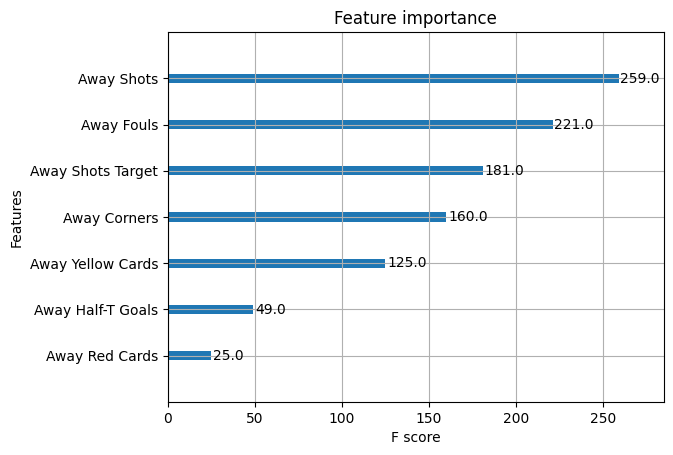

In [14]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

In [39]:
home_club = GetClubEncodedValue('Standard')

def GetImagePathClub(club,side):
    side = 'HomeTeamEnc' if side == 'Home' else 'AwayTeamEnc'

    dataFrame = dfNumeric[(dfNumeric[side] == home_club)][['Home Full-T Goals','Away Full-T Goals','Full Result_enc','HomeTeamEnc','AwayTeamEnc']]
    if side == 'HomeTeamEnc':
        Full_Result_enc	= 0
    elif side == 'AwayTeamEnc':
        Full_Result_enc	= 1
    
    return len(dataFrame[dataFrame['Full Result_enc']==Full_Result_enc])/len(dataFrame)
    #gameWon = len(dfs[dfs['Full Result_enc']==1])
    
   # return gameWon

    if club == 1 : 
        return '../assets/img/pepe1.png'
    else :
        return '../assets/img/meme frog.png'

dfs = GetImagePathClub('Standard','Home')
dfs

AttributeError: 'str' object has no attribute 'len'

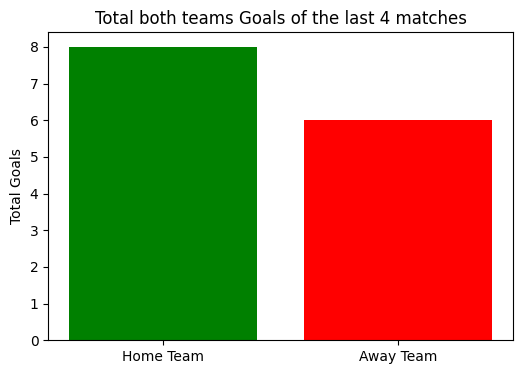

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt

dfNumeric = pd.read_pickle("cleaned_data.pkl")
home_club = 8
away_club = 2

def GenerateTotalGoalsTeamsBarChart(home_club,away_club):

    matchesBTTeams = dfNumeric[((dfNumeric['HomeTeamEnc'] ==home_club) | (dfNumeric['AwayTeamEnc'] ==home_club))&((dfNumeric['HomeTeamEnc'] ==away_club) | (dfNumeric['AwayTeamEnc'] ==away_club)) ] 

    #total Goals of both clubs
    N_matches = len(matchesBTTeams)


    # Data (Total goals for home and away teams)
    HomeTotalGoal = matchesBTTeams['Home Full-T Goals'].sum()
    AwayTotalGoal = matchesBTTeams['Away Full-T Goals'].sum()

    # Labels and values for the bar chart
    teams = ['Home Team', 'Away Team']
    total_goals = [HomeTotalGoal, AwayTotalGoal]

    # Create the bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(teams, total_goals, color=['green', 'red'])

    # Add title and labels
    plt.title(f'Total both teams Goals of the last {N_matches} matches')
    plt.ylabel('Total Goals')

    # Show the chart
    plt.show()

#home wining vs away losing of both clubs ex : they faced each other 10 times 4 time home lost and 6 away win

#home winning 

GenerateTotalGoalsTeamsBarChart(home_club,away_club)
#first half , and full time match performance 


In [16]:
matchesBTTeams

NameError: name 'matchesBTTeams' is not defined

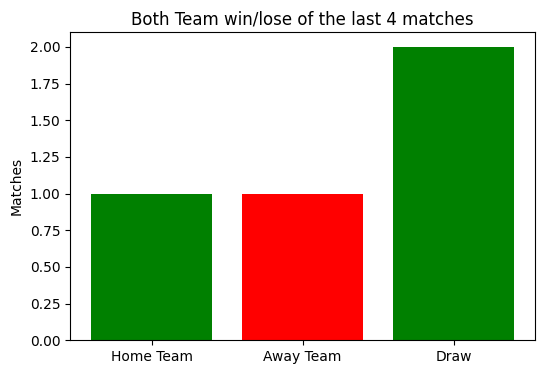

In [122]:
#Home winning
homeTotalWinning = matchesBTTeams[matchesBTTeams['Full Result_enc']==0]
N_match_Home_won = len(homeTotalWinning)

#away winning 
awayTotalWinning = matchesBTTeams[matchesBTTeams['Full Result_enc']==1]
N_match_Away_won = len(awayTotalWinning)

dfTotalDraw= matchesBTTeams[matchesBTTeams['Full Result_enc']==2]
N_draw_match = len(dfTotalDraw)

#Chart wining/losing

# Labels and values for the bar chart
teams = ['Home Team', 'Away Team','Draw']
total_wins = [N_match_Home_won, N_match_Away_won,N_draw_match]
n_matches = N_match_Home_won+N_match_Away_won+N_draw_match
# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(teams, total_wins, color=['green', 'red'])

# Add title and labels
plt.title(f'Both Team win/lose of the last {n_matches} matches')
plt.ylabel('Matches')

# Show the chart
plt.show()



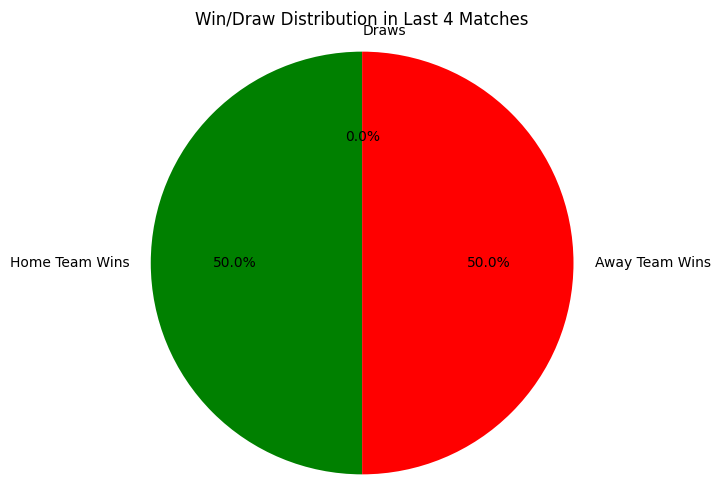

In [121]:
import matplotlib.pyplot as plt

home_club = 11
away_club = 9

def generateWinLosePieChart(homeClub,AwayClub) : 
    matchesBTTeams = dfNumeric[((dfNumeric['HomeTeamEnc'] ==home_club) | (dfNumeric['AwayTeamEnc'] ==home_club))&((dfNumeric['HomeTeamEnc'] ==away_club) | (dfNumeric['AwayTeamEnc'] ==away_club)) ] 

    # Home winning
    homeTotalWinning = matchesBTTeams[matchesBTTeams['Full Result_enc'] == 0]
    N_match_Home_won = len(homeTotalWinning)

    # Away winning
    awayTotalWinning = matchesBTTeams[matchesBTTeams['Full Result_enc'] == 1]
    N_match_Away_won = len(awayTotalWinning)

    # Draw matches
    dfTotalDraw = matchesBTTeams[matchesBTTeams['Full Result_enc'] == 2]
    N_draw_match = len(dfTotalDraw)

    # Data for pie chart
    teams = ['Home Team Wins', 'Away Team Wins', 'Draws']
    total_wins = [N_match_Home_won, N_match_Away_won, N_draw_match]

    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(total_wins, labels=teams, autopct='%1.1f%%', colors=['green', 'red', 'blue'], startangle=90)

    # Add title
    plt.title(f'Win/Draw Distribution in Last {sum(total_wins)} Matches')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    # Show the chart
    plt.show()

generatePieChart(home_club,away_club)

In [ ]:
Df_total_club_matches =  dfNumeric[(dfNumeric['HomeTeamEnc']== home_club) | (dfNumeric['AwayTeamEnc']== home_club)]
total_club_matches = len(Df_total_club_matches)

home_club = 4
away_club = 12
"Anderlech Charleroi"
def ClubAwayHomediStat(clubName)->dict :
    #172 matchs, Away  = 87(31 win,22 draw,34lose) , Home 85(39win,lose 26,draw 20)
    #HOME--------------------------------------------------------------------------------
    Df_total_home_club_matches =  dfNumeric[dfNumeric['HomeTeamEnc']== clubName]
    total_home_club_matches = len(Df_total_home_club_matches)
    #home_win
    Df_Home_win_club_matches =  dfNumeric[(dfNumeric['HomeTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 0))]
    home_win_club_matches_count= len(Df_Home_win_club_matches)
    #home_lost
    Df_Home_lost_club_matches =  dfNumeric[(dfNumeric['HomeTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 1))]
    home_lost_club_matches_count= len(Df_Home_lost_club_matches)
    #home_draw
    Df_Home_draw_club_matches =  dfNumeric[(dfNumeric['HomeTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 2))]
    home_draw_club_matches_count= len(Df_Home_draw_club_matches)

    #Away--------------------------------------------------------------------------------

    Df_total_away_club_matches =  dfNumeric[dfNumeric['AwayTeamEnc']== clubName]
    total_away_club_matches = len(Df_total_away_club_matches)
    #home_win
    Df_away_win_club_matches =  dfNumeric[(dfNumeric['AwayTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 1))]
    away_win_club_matches_count= len(Df_away_win_club_matches)
    #home_lost
    Df_away_lost_club_matches =  dfNumeric[(dfNumeric['AwayTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 0))]
    away_lost_club_matches_count= len(Df_away_lost_club_matches)
    #home_draw
    Df_away_draw_club_matches =  dfNumeric[(dfNumeric['AwayTeamEnc']== clubName)&((dfNumeric['Full Result_enc']== 2))]
    away_draw_club_matches_count= len(Df_away_draw_club_matches)

    
    wining_home_rate =  "{:.2f}".format(home_win_club_matches_count / total_home_club_matches)
    wining_away_rate =  "{:.2f}".format(away_win_club_matches_count / total_away_club_matches)

    losing_home_rate = "{:.2f}".format(home_lost_club_matches_count / total_home_club_matches)
    losing_away_rate = "{:.2f}".format(away_lost_club_matches_count / total_away_club_matches)

    draw_home_rate = "{:.2f}".format(home_draw_club_matches_count / total_home_club_matches)
    draw_away_rate = "{:.2f}".format(away_draw_club_matches_count / total_away_club_matches)

    #Df_Home_win_club_matches[['HomeTeamEnc','AwayTeamEnc','Home Full-T Goals','Away Full-T Goals','Full Result_enc']]

    return {
        'wining_home_rate' :wining_home_rate,
        'losing_home_rate': losing_home_rate,
        'draw_home_rate':draw_home_rate,
        'wining_away_rate' : wining_away_rate,
        'losing_away_rate':losing_away_rate,
        'draw_away_rate':draw_away_rate
    }


ClubAwayHomediStat(5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#------------------Statistic for one club (choosen Home club)------------------

#Wining rate in away and home of both teams (in general) ---- or across the years ex : 2020-2021

def generateRadarChart(club) :
    # Split the keys and values
    stats = ClubAwayHomediStat(club)

    labels = list(stats.keys())
    values = list(map(float, stats.values()))  # Convert string values to floats

    # Add the first value to the end to close the radar chart
    values += values[:1]

    # Create the angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    # Initialize the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot the radar chart
    ax.fill(angles, values, color='b', alpha=0.25)
    ax.plot(angles, values, color='b', linewidth=2)

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title and show the plot
    plt.title('Club Performance Stats (Home vs. Away)')
    plt.show()

generateRadarChart(7)

In [ ]:
dfNumeric[['HomeTeamEnc','AwayTeamEnc','Home Full-T Goals','Away Full-T Goals','Full Result_enc']]